# Decision Tree - 다운 샘플링


In [2]:
# 라이브러리 로드
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [3]:
# 데이터 로딩
df = pd.read_csv('./data/down_sampling.csv', encoding='utf-8')

In [4]:
df

,일시,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
0,2013-09-07 15:00:00,4.6,10.4,0.5,0.8,1015.7,0.0
1,2011-04-13 05:00:00,5.2,7.7,0.2,0.4,1016.1,0.0
2,2019-01-29 01:00:00,9.8,13.2,1.1,1.8,1023.6,0.0
3,2012-06-08 05:00:00,2.9,8.3,0.1,0.2,1005.3,0.0
4,2016-07-11 16:00:00,1.9,6.7,0.1,0.2,1004.1,0.0
...,...,...,...,...,...,...,...
13737,2020-12-30 20:00:00,14.4,19.5,2.0,3.1,1018.9,1.0
13738,2020-12-30 21:00:00,13.0,20.6,2.0,3.5,1020.4,1.0
13739,2020-12-30 22:00:00,10.7,16.3,2.0,3.4,1021.3,1.0
13740,2020-12-30 23:00:00,13.9,20.4,2.3,3.8,1021.5,1.0


In [5]:
df = df.set_index('일시')
df

,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
일시,,,,,,
2013-09-07 15:00:00,4.6,10.4,0.5,0.8,1015.7,0.0
2011-04-13 05:00:00,5.2,7.7,0.2,0.4,1016.1,0.0
2019-01-29 01:00:00,9.8,13.2,1.1,1.8,1023.6,0.0
2012-06-08 05:00:00,2.9,8.3,0.1,0.2,1005.3,0.0
2016-07-11 16:00:00,1.9,6.7,0.1,0.2,1004.1,0.0
...,...,...,...,...,...,...
2020-12-30 20:00:00,14.4,19.5,2.0,3.1,1018.9,1.0
2020-12-30 21:00:00,13.0,20.6,2.0,3.5,1020.4,1.0
2020-12-30 22:00:00,10.7,16.3,2.0,3.4,1021.3,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13742 entries, 2013-09-07 15:00:00 to 2020-12-31 00:00:00
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WIND_SPEED  13742 non-null  float64
 1   GUST_WIND   13742 non-null  float64
 2   SIG_WAVE    13742 non-null  float64
 3   MAX_WAVE    13742 non-null  float64
 4   HPA         13742 non-null  float64
 5   특보강도        13742 non-null  float64
dtypes: float64(6)
memory usage: 751.5+ KB


In [7]:
# 데이터셋 구성
data = df[['WIND_SPEED', 'GUST_WIND', 'SIG_WAVE', 'MAX_WAVE','HPA']].to_numpy()
target = df['특보강도'].to_numpy()

In [8]:
# 훈련세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [9]:
# 훈련세트, 테스트 세트 크기
print(train_input.shape, test_input.shape)

(10993, 5) (2749, 5)


In [10]:
# StandardScaler 사용해서 훈련세트 전처리
# 같은 객체로 테스트 세트 변환
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [11]:
# 로지스틱 회귀 모델 훈련
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))


# => 둘 다 낮게 나옴 (과소적합?)

0.8129718912034931
0.8090214623499454


In [12]:
# 로지스틱 회귀가 학습한 계수와 절편 출력
print(lr.coef_, lr.intercept_)

[[-0.24031514  1.48865686  4.24100565 -2.41281415  0.00744132]] [0.35285322]


## 결정트리

In [13]:
# score() 메서드로 정확도 평가
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target)) # 훈련 세트
print(dt.score(test_scaled, test_target)) # 테스트 세트

1.0
0.8268461258639506


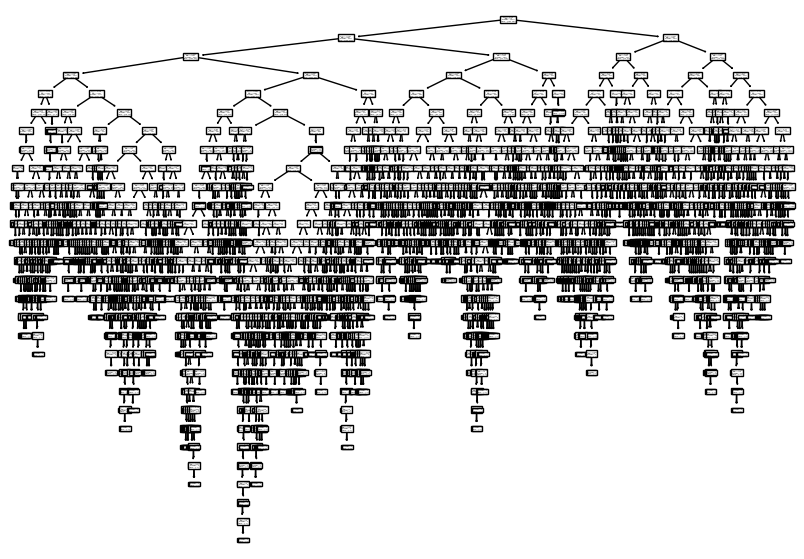

In [14]:
# plot_tree() 트리
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()


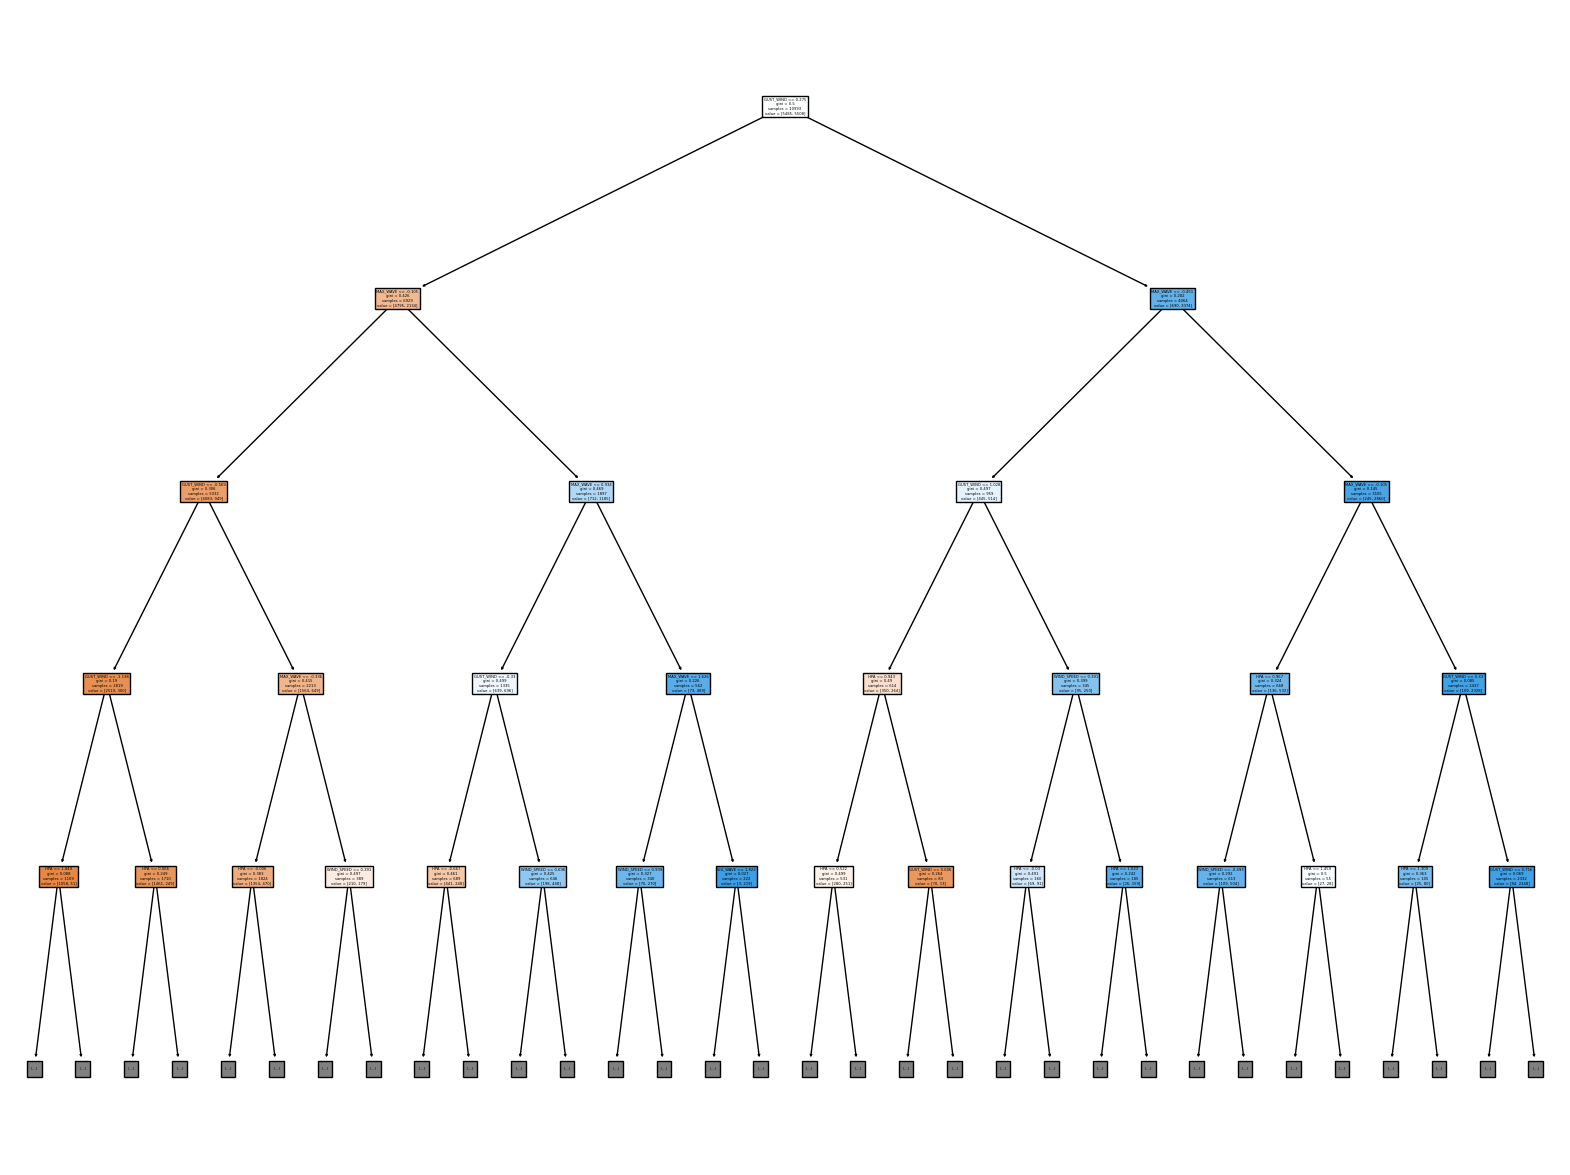

In [15]:
# 트리 깊이 제한
plt.figure(figsize=(20,15))
plot_tree(dt, max_depth=4, filled=True, feature_names=['WIND_SPEED','GUST_WIND','MAX_WAVE','SIG_WAVE','HPA'])
plt.show()

In [16]:
# 가지치기
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.7939597925952879
0.7861040378319389


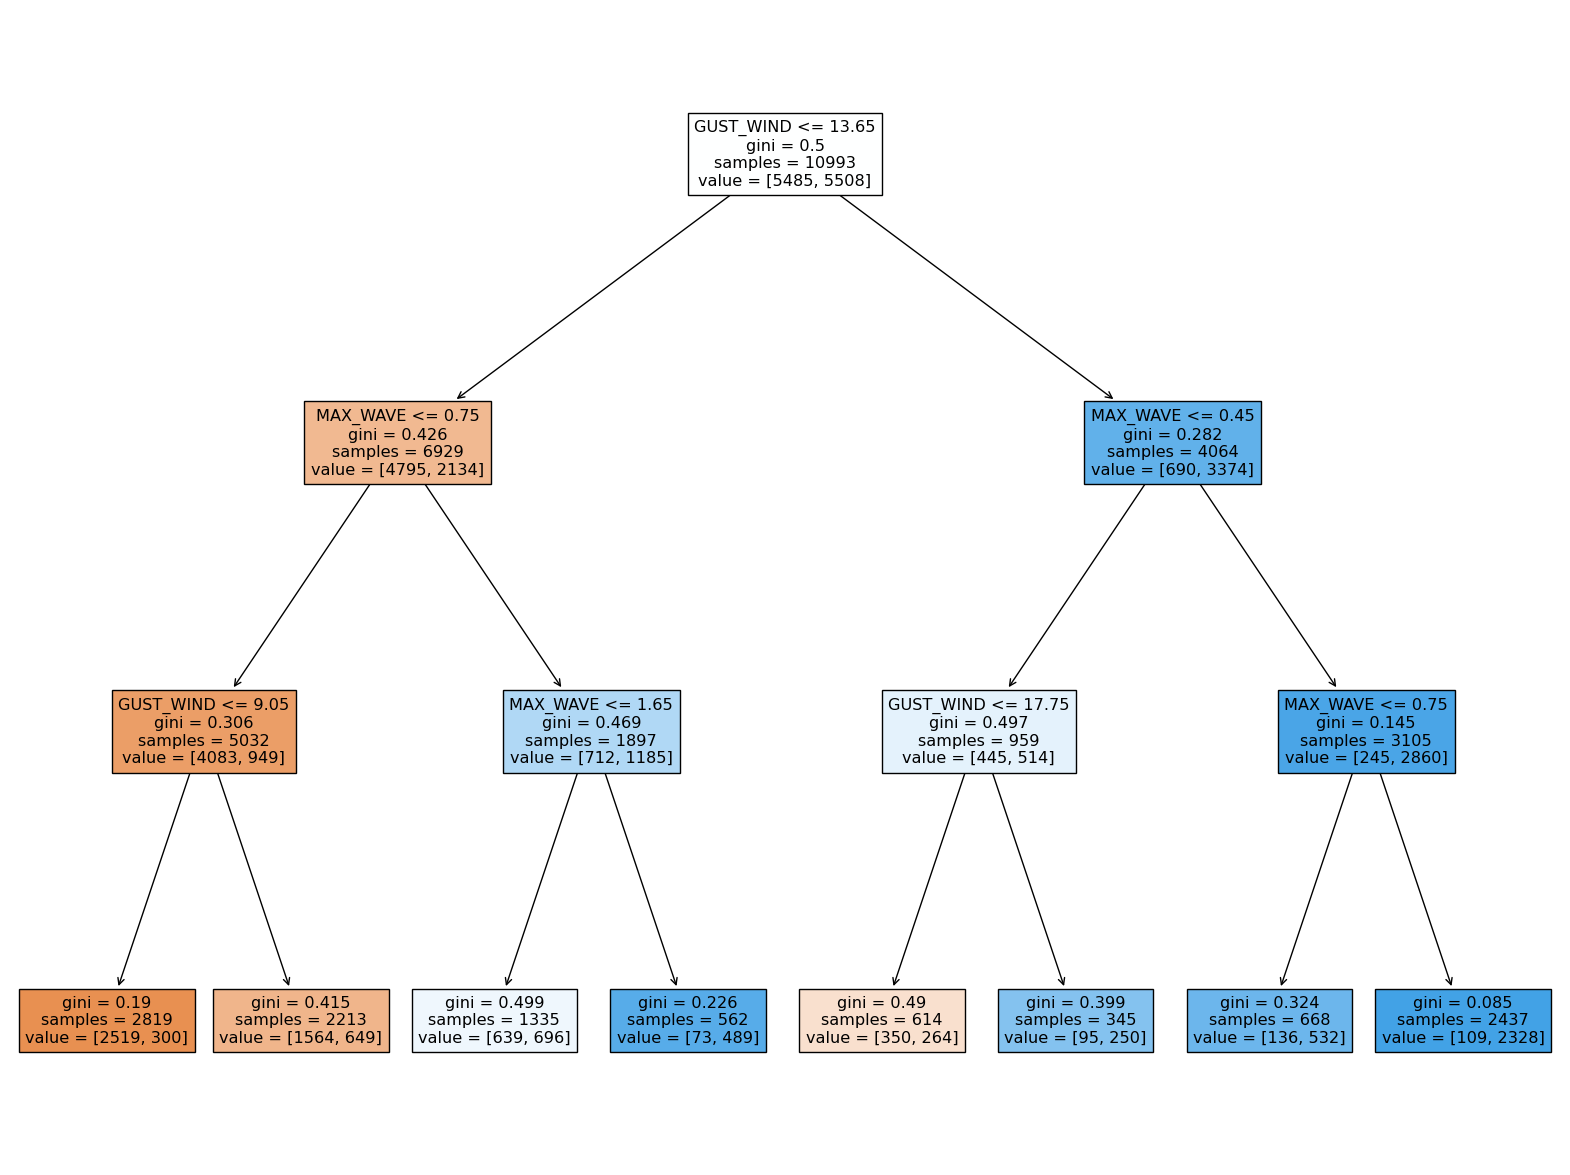

In [17]:
# plot tree()
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['WIND_SPEED','GUST_WIND','MAX_WAVE','SIG_WAVE','HPA'])
plt.show()

In [18]:
# 특성 중요도
print(dt.feature_importances_)

[0.         0.63791854 0.36208146 0.         0.        ]


## 종합코드

In [ ]:
# 라이브러리 로드
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 데이터 로딩
df = pd.read_csv('./data/down_sampling.csv', encoding='utf-8')

# index
df = df.set_index('일시')
df

# 데이터셋 구성
data = df[['WIND_SPEED', 'GUST_WIND', 'SIG_WAVE', 'MAX_WAVE','HPA']].to_numpy()
target = df['특보강도'].to_numpy()

# 훈련세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

# 훈련세트, 테스트 세트 크기
print(train_input.shape, test_input.shape)

# StandardScaler 사용해서 훈련세트 전처리
# 같은 객체로 테스트 세트 변환
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# 로지스틱 회귀 모델 훈련
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

# 로지스틱 회귀가 학습한 계수와 절편 출력
print(lr.coef_, lr.intercept_)

# score() 메서드로 정확도 평가
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target)) # 훈련 세트
print(dt.score(test_scaled, test_target)) # 테스트 세트

# plot_tree() 트리
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

# 트리 깊이 제한
plt.figure(figsize=(20,15))
plot_tree(dt, max_depth=4, filled=True, feature_names=['WIND_SPEED','GUST_WIND','MAX_WAVE','SIG_WAVE','HPA'])
plt.show()

# 가지치기
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

# plot tree()
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['WIND_SPEED','GUST_WIND','MAX_WAVE','SIG_WAVE','HPA'])
plt.show()

# 특성 중요도
print(dt.feature_importances_)